In [1]:
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins
print(folium.__version__)
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
plt.rcParams['axes.unicode_minus'] = False
# plt.figure(figsize=(10, 5))

# font_path = 'C:\\Windows\\Fonts\\NanumBarunGothicUltraLight.ttf' #한글 폰트 경로 
font_path = 'C:\\Windows\\Fonts\\malgun.ttf' #한글 폰트 경로 

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

import matplotlib.pyplot as plt
%matplotlib inline

0.12.1


In [2]:
geopath = 'subseoul.geojson'

In [3]:
geostr = json.load(open(geopath,encoding='utf-8'))

In [4]:
geostr

{'type': 'FeatureCollection',
 'name': 'HangJeongDong_ver202000701',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 0,
    'adm_nm': '서울특별시 종로구 사직동',
    'adm_cd': '1101053',
    'adm_cd2': '1111053000',
    'sidonm': '서울특별시',
    'sggnm': '종로구'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[126.97688884274817, 37.575650779448786],
       [126.9770344988775, 37.56919453005455],
       [126.97597472821249, 37.569336299425764],
       [126.97537470991254, 37.56931556702156],
       [126.97433193562325, 37.56926180051753],
       [126.96904837001854, 37.568194417708334],
       [126.96854493603384, 37.56842767961276],
       [126.9666499598212, 37.56949165520658],
       [126.96628175024485, 37.5697007347987],
       [126.9660973270804, 37.5698565097237],
       [126.96572852922577, 37.570183936115114],
       [126.96592699822128, 37.5703188056862],
       [126.966010940

In [5]:
pop=pd.read_csv('상권데이터_최종.csv',encoding='euc-kr')

In [6]:
pop['행정동코드_시각화'] = pop['행정동코드'].apply(lambda x : str(x)[:8])

In [7]:
pop.head()

,기준_분기_코드,행정동코드,시군구명_x,읍면동명_x,서비스_업종_코드_명,당월_매출_건수,당월_매출_금액,월요일_매출_건수,월요일_매출_금액,화요일_매출_건수,...,점포수,프랜차이즈_점포_수,유사_업종_점포_수,개업_점포_수,폐업_점포_수,개업_율,폐업_률,시군구명_y,읍면동명_y,행정동코드_시각화
0,1,1111051500,종로구,청운효자동,11,0,0.000000e+00,0,0,0,...,0,0,3,0,0,0.0,0.000000,종로구,청운효자동,11110515
1,1,1111051500,종로구,청운효자동,23,77442,5.241687e+08,9874,75773485,11612,...,4,3,4,0,0,0.0,0.000000,종로구,청운효자동,11110515
2,1,1111051500,종로구,청운효자동,25,144552,2.867758e+09,20689,385554463,19519,...,22,0,24,0,3,0.0,22.833333,종로구,청운효자동,11110515
3,1,1111051500,종로구,청운효자동,26,579,4.501151e+07,82,22009304,0,...,1,0,6,0,0,0.0,0.000000,종로구,청운효자동,11110515
4,1,1111051500,종로구,청운효자동,31,25602,4.253701e+08,3811,60187036,2347,...,20,0,21,1,0,7.0,0.000000,종로구,청운효자동,11110515


In [8]:
mapping = pd.read_excel('행정동코드_매핑정보_20200325.xlsx',encoding='euc-kr')

TypeError: read_excel() got an unexpected keyword argument 'encoding'

In [10]:
mapping = pd.read_excel('행정동코드_매핑정보_20200325.xlsx')

In [11]:
mapping.head()

,통계청행정동코드,행자부행정동코드,시도명,시군구명,행정동명
0,H_SDNG_CD,H_DNG_CD,DO_NM,CT_NM,H_DNG_NM
1,1101053,11110530,서울,종로구,사직동
2,1101054,11110540,서울,종로구,삼청동
3,1101055,11110550,서울,종로구,부암동
4,1101056,11110560,서울,종로구,평창동


In [12]:
mapping.rename(columns = {'행자부행정동코드' : '행정동코드_시각화'}, inplace=True)

In [13]:
mapping

,통계청행정동코드,행정동코드_시각화,시도명,시군구명,행정동명
0,H_SDNG_CD,H_DNG_CD,DO_NM,CT_NM,H_DNG_NM
1,1101053,11110530,서울,종로구,사직동
2,1101054,11110540,서울,종로구,삼청동
3,1101055,11110550,서울,종로구,부암동
4,1101056,11110560,서울,종로구,평창동
...,...,...,...,...,...
420,1125070,11740690,서울,강동구,둔촌1동
421,1125071,11740700,서울,강동구,둔촌2동
422,1125072,11740570,서울,강동구,암사1동
423,1125073,11740610,서울,강동구,천호2동


In [14]:
data = pd.merge(left = pop, right = mapping, on = '행정동코드_시각화', how = 'left')

In [15]:
data.head()

,기준_분기_코드,행정동코드,시군구명_x,읍면동명_x,서비스_업종_코드_명,당월_매출_건수,당월_매출_금액,월요일_매출_건수,월요일_매출_금액,화요일_매출_건수,...,폐업_점포_수,개업_율,폐업_률,시군구명_y,읍면동명_y,행정동코드_시각화,통계청행정동코드,시도명,시군구명,행정동명
0,1,1111051500,종로구,청운효자동,11,0,0.000000e+00,0,0,0,...,0,0.0,0.000000,종로구,청운효자동,11110515,1101072,서울,종로구,청운효자동
1,1,1111051500,종로구,청운효자동,23,77442,5.241687e+08,9874,75773485,11612,...,0,0.0,0.000000,종로구,청운효자동,11110515,1101072,서울,종로구,청운효자동
2,1,1111051500,종로구,청운효자동,25,144552,2.867758e+09,20689,385554463,19519,...,3,0.0,22.833333,종로구,청운효자동,11110515,1101072,서울,종로구,청운효자동
3,1,1111051500,종로구,청운효자동,26,579,4.501151e+07,82,22009304,0,...,0,0.0,0.000000,종로구,청운효자동,11110515,1101072,서울,종로구,청운효자동
4,1,1111051500,종로구,청운효자동,31,25602,4.253701e+08,3811,60187036,2347,...,0,7.0,0.000000,종로구,청운효자동,11110515,1101072,서울,종로구,청운효자동


In [16]:
week=['월요일_매출_금액','화요일_매출_금액','수요일_매출_금액','목요일_매출_금액','금요일_매출_금액', '토요일_매출_금액','일요일_매출_금액']

In [17]:
week

['월요일_매출_금액',
 '화요일_매출_금액',
 '수요일_매출_금액',
 '목요일_매출_금액',
 '금요일_매출_금액',
 '토요일_매출_금액',
 '일요일_매출_금액']

In [18]:
string = {11:'숙박', 21:'백화점', 22:'마트', 23:'편의점', 24:'면세점', 25:'소매점', 26:'식료품', 31:'한식' ,32:'양식',33:'일식',
          34:'중식',35:'부페',36:'일반대중음식',37:'카페베이커리',38:'패스트푸드',39:'유흥주점',41:'가전',42:'인테리어',
          43:'가구',44:'문구기타',51:'성인의류',52:'아동캐주얼',53:'스포츠용품',54:'침구직물',55:'잡화',56:'주얼리',57:'안경',
          58:'화장품',59:'기타잡화',61:'극장공연',62:'스포츠',63:'오락',64:'미술',65:'음악',66:'서점',71:'미용건강',
          72:'의료',73:'교육',74:'주유',75:'자동차',76:'애완동물',77:'생활기타'}

In [19]:
data.서비스_업종_코드_명 = data.서비스_업종_코드_명.map(string)

In [20]:
close = data.pivot_table(index='서비스_업종_코드_명',columns = '기준_분기_코드',values = '당월_매출_금액')

In [21]:
close = close.drop(['극장공연','음악','주유'] ,axis=0)

''

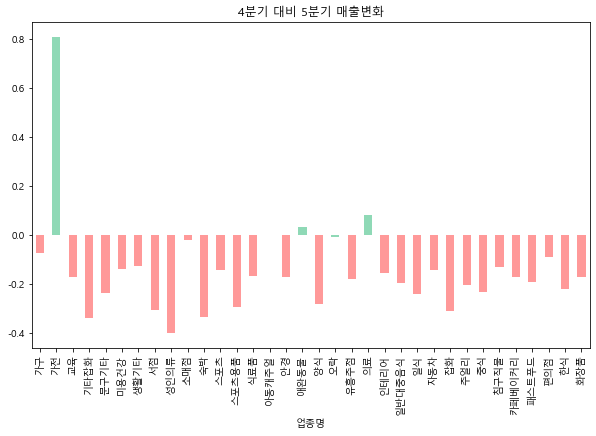

In [22]:
plt.figure(figsize=(10,6))
((close[5]-close[4])/close[4]).plot(kind='bar',color=['#ff9999','#8fd9b6','#ff9999','#ff9999','#ff9999','#ff9999','#ff9999','#ff9999','#ff9999','#ff9999','#ff9999','#ff9999','#ff9999','#ff9999','#ff9999','#ff9999','#8fd9b6','#ff9999','#8fd9b6','#ff9999','#8fd9b6','#ff9999','#ff9999','#ff9999','#ff9999','#ff9999','#ff9999','#ff9999','#ff9999','#ff9999','#ff9999','#ff9999','#ff9999','#ff9999'])
plt.title('4분기 대비 5분기 매출변화')
plt.xlabel('업종명')
;


# 업종 별 분기 별 당월 매출 금액 지도시각화 

In [23]:
data.drop(['행정동코드','시군구명_x','읍면동명_x','시군구명_y','읍면동명_y','행정동코드_시각화','시도명','시군구명','행정동명'],axis=1,inplace=True)

In [24]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns' ,500)

31,37,71미용건강,26식료품,39유흥주점,23편의점,34중식

In [25]:
#업종 지정할때 
adult = data[data.서비스_업종_코드_명 == '일반대중음식']

In [26]:
#보고싶은거 여기서 골라서 '당월_매출_금액' 위치에 넣어주면 댐
adult.columns

Index(['기준_분기_코드', '서비스_업종_코드_명', '당월_매출_건수', '당월_매출_금액', '월요일_매출_건수',
       '월요일_매출_금액', '화요일_매출_건수', '화요일_매출_금액', '수요일_매출_건수', '수요일_매출_금액',
       '목요일_매출_건수', '목요일_매출_금액', '금요일_매출_건수', '금요일_매출_금액', '토요일_매출_건수',
       '토요일_매출_금액', '일요일_매출_건수', '일요일_매출_금액', '시간대_00~06_매출_금액',
       '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액',
       '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '시간대_건수~06_매출_건수',
       '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수',
       '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수', '남성_매출_금액',
       '여성_매출_건수', '여성_매출_금액', '주말_매출_건수', '주말_매출_금액', '주중_매출_건수', '주중_매출_금액',
       '연령대_10_매출_건수', '연령대_10_매출_금액', '연령대_20_매출_건수', '연령대_20_매출_금액',
       '연령대_30_매출_건수', '연령대_30_매출_금액', '연령대_40_매출_건수', '연령대_40_매출_금액',
       '연령대_50_매출_건수', '연령대_50_매출_금액', '연령대_60_이상_매출_건수', '연령대_60_이상_매출_금액',
       '점포_수', '점포수', '프랜차이즈_점포_수', '유사_업종_점포_수', '개업_점포_수', '폐업_점포_수', '개업_율',
       '폐업_률', '통계청행정동코드'],
      dtype='object')

In [36]:
adult_sales= adult[['당월_매출_금액','통계청행정동코드']]
legeno = adult_sales.groupby('통계청행정동코드').sum().reset_index()
for i in range(1,7):
    globals()['adult{}'.format(i)] = adult[adult.기준_분기_코드 == i]
    adult_value = globals()['adult{}'.format(i)][['당월_매출_금액', '통계청행정동코드']]
    month = adult_value.groupby('통계청행정동코드').sum().reset_index()
    month.통계청행정동코드 = month.통계청행정동코드.apply(str)
    m = folium.Map(location=[37.5502,126.982],zoom_start=10.5,tiles='cartodbpositron')
    folium.Choropleth(
        geo_data=geostr,
        data=month,
        columns=['통계청행정동코드','당월_매출_금액'],
        key_on='feature.properties.adm_cd',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        nan_fill_color='white',
        nan_fill_opacity=0.4,
        bins=np.percentile(legeno['당월_매출_금액'], q=[0,20,40,60,90,100], interpolation='nearest')
        ).add_to(m)
    m.save('{} {} {} 분기.html'.format(adult.서비스_업종_코드_명.unique()[0],adult_value.columns[0],i))
    

In [56]:
adult_sales= adult[['당월_매출_금액','통계청행정동코드']]
legeno = adult_sales.groupby('통계청행정동코드').sum().reset_index()

In [40]:
#여기는 5개 나눈 값 출력
pd.options.display.float_format = '{:.2f}'.format
pd.Series(np.percentile(legeno['당월_매출_금액'], q=[0,20,40,60,80,100], interpolation='nearest'))

0              0.00
1     2561536439.00
2     5848524258.00
3    10342913917.00
4    18886816399.00
5   145426920559.00
dtype: float64

In [179]:
adult = data[data['서비스_업종_코드_명'].isin(['양식','중식','일식','패스트푸드','일반대중음식'])]

In [180]:
adult10=adult[['기준_분기_코드','당월_매출_금액','서비스_업종_코드_명']]

In [181]:
adult10.rename(columns = {'당월_매출_금액' : '분기_매출액'}, inplace = True)

C:\Users\rkdxo\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [182]:
adult123 = adult10[adult10['기준_분기_코드']==1].index

In [186]:
adult10=adult10.drop(adult123)

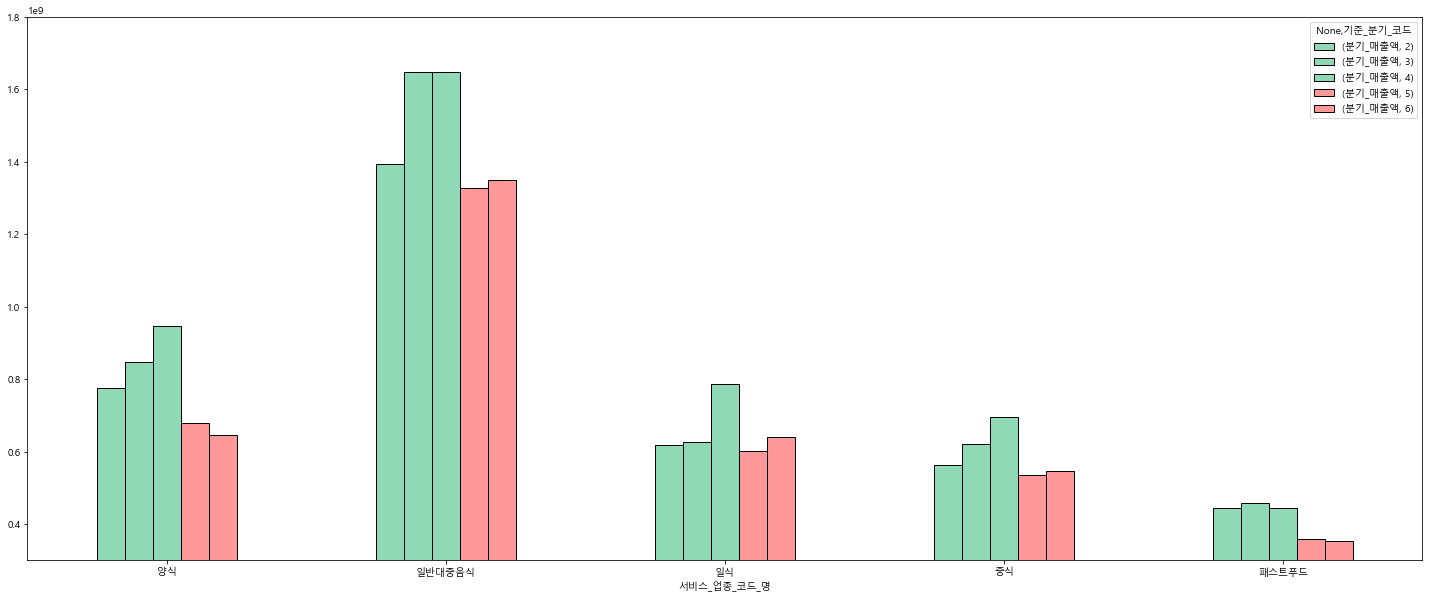

In [187]:
adult10.pivot_table(index=['서비스_업종_코드_명'],columns=['기준_분기_코드'], values=['분기_매출액']).plot(kind = 'bar',rot=0 , figsize=(25,10),
                                                                                       color=['#8fd9b6','#8fd9b6','#8fd9b6','#ff9999','#ff9999']
                                                                                        ,ylim=(0.3*1e9,1.8*1e9)
                                                                                       ,edgecolor='black')

# EDA 필요한 것들만

#  1. 한식 매출액

In [113]:
adult10=adult[['기준_분기_코드','당월_매출_금액','통계청행정동코드']]

In [114]:
adult104=adult10[adult10['기준_분기_코드']==4]
adult104=adult104[['통계청행정동코드','당월_매출_금액']]

In [122]:
adult105=adult10[adult10['기준_분기_코드']==5]
adult105=adult105[['통계청행정동코드','당월_매출_금액']]
adult105.columns = ['통계청행정동코드','당월_매출_금액1']

In [116]:
##가장 진한 색은 코로나에 영향이 없다고 가정
q4 = adult104.groupby('통계청행정동코드').sum().reset_index()
q5 = adult105.groupby('통계청행정동코드').sum().reset_index()
adult_sales= adult[['당월_매출_금액','통계청행정동코드']]
legeno = adult_sales.groupby('통계청행정동코드').sum().reset_index()
pd.options.display.float_format = '{:.2f}'.format
pd.Series(np.percentile(legeno['당월_매출_금액'], q=[0,20,40,60,80,100], interpolation='nearest'))

0              0.00
1     6141230568.00
2    14790874733.00
3    26780733892.00
4    52081128156.00
5   704708904977.00
dtype: float64

In [126]:
qa=pd.merge(q4,q5,how='outer',on='통계청행정동코드')

In [130]:
qa['차이']=qa['당월_매출_금액_x']-qa['당월_매출_금액_y']

In [147]:
qatop=qa.sort_values(by='차이',ascending=True)

In [148]:
qatop
#1112051 은평구 녹번동 가장 큰 차이 보임 코로나로 인해 오히려 매출 증가
#나머지는 그냥 미미한 차이로 여긴다
#종로구 종로 1,2,3,4동은 매출 rank는 차이가 없지만 

,통계청행정동코드,당월_매출_금액_x,당월_매출_금액_y,차이
155,1112051,3133115421.00,3750342148.00,-617226727.00
40,1103069,554274743.00,605802744.00,-51528001.00
162,1112060,116829007.00,162689567.00,-45860560.00
133,1110052,82278199.00,109522132.00,-27243933.00
176,1113069,299555726.00,321164638.00,-21608912.00
86,1106090,135276246.00,155566461.00,-20290215.00
367,1125063,504569780.00,522911521.00,-18341741.00
91,1107059,14152333.00,32378991.00,-18226658.00
139,1110060,582074147.00,595995027.00,-13920880.00
107,1108066,165079490.00,173858230.00,-8778740.00


In [136]:
#판매액의 변화는 대부분 드라마틱하게 나오는데 몇 지역은 여전히 판매량이 일정수준 이상임 그거 찾으려는 과정
q4top = q4.sort_values(by="당월_매출_금액", ascending=False).groupby("통계청행정동코드")
q5top = q5.sort_values(by="당월_매출_금액", ascending=False).groupby("통계청행정동코드")

In [137]:
q4top.head(10)
#1101061	144359000000.00 종로구 종로 1,2,3,4동
#1102052	118204000000.00 중구 소공동
#1123064	108922000000.00 강남구 역삼1동
#1119054	62127518901.00 영등포구 여의동
#1114066	59041297087.00 마포구 서교동

,통계청행정동코드,당월_매출_금액
6,1101061,144359000000.00
15,1102052,118204000000.00
331,1123064,108922000000.00
256,1119054,62127518901.00
188,1114066,59041297087.00
312,1122053,45856200356.00
17,1102055,45722135508.00
326,1123053,43320296382.00
327,1123058,38872679315.00
325,1123052,36079175254.00


In [138]:
q5top.head(10)
#1101061	97922346724.00 종로구 종로 1,2,3,4동
#1123064	87797791545.00 강남구 역삼1동
#1102052	83255073992.00 중구 소공동

,통계청행정동코드,당월_매출_금액
6,1101061,97922346724.00
331,1123064,87797791545.00
15,1102052,83255073992.00
256,1119054,48119656213.00
188,1114066,42861284265.00
326,1123053,37279059637.00
312,1122053,36379726068.00
330,1123063,29786512028.00
325,1123052,29172404285.00
327,1123058,28035891940.00


q4,q5 동시에 상위 20퍼 들은 동 제외하면 한식 매출 드라마틱하게 떨어졌다 보여주기 쌉가능(상위20퍼들도 매출액은 줄음)

# 2.중식 매출

In [151]:
adult = data[data.서비스_업종_코드_명 == '중식']
adult10=adult[['기준_분기_코드','당월_매출_금액','통계청행정동코드']]
adult104=adult10[adult10['기준_분기_코드']==4]
adult104=adult104[['통계청행정동코드','당월_매출_금액']]
adult105=adult10[adult10['기준_분기_코드']==5]
adult105=adult105[['통계청행정동코드','당월_매출_금액']]
q4 = adult104.groupby('통계청행정동코드').sum().reset_index()
q5 = adult105.groupby('통계청행정동코드').sum().reset_index()
adult_sales= adult[['당월_매출_금액','통계청행정동코드']]
legeno = adult_sales.groupby('통계청행정동코드').sum().reset_index()
pd.options.display.float_format = '{:.2f}'.format
pd.Series(np.percentile(legeno['당월_매출_금액'], q=[0,20,40,60,80,100], interpolation='nearest'))

0             0.00
1     332937916.00
2     914711074.00
3    1725827510.00
4    4243289864.00
5   56255769686.00
dtype: float64

In [152]:
q4top = q4.sort_values(by="당월_매출_금액", ascending=False).groupby("통계청행정동코드")
q5top = q5.sort_values(by="당월_매출_금액", ascending=False).groupby("통계청행정동코드")

In [199]:
qa=pd.merge(q4,q5,how='outer',on='통계청행정동코드')
qa['차이']=qa['당월_매출_금액_x']-qa['당월_매출_금액_y']
qatop=qa.sort_values(by='차이',ascending=True)
qatop['비율'] = qatop['차이']/qatop['당월_매출_금액_x']
qatop.sort_values(by='비율',ascending=False)
qa.rename(columns = {'당월_매출_금액_y' : '5분기_매출액','당월_매출_금액_x' : '4분기_매출액'}, inplace = True)
#영등포구 대림2동, 강남구 역삼1동, 중구 소공동 액수로는 떡락
#성동구 옥수동 중식 멸망
#동작구 흑석동, 광진구 화양동, 동대문구 청량리동, 용산구 청파동, 영등포구 대림2동 매출 50%이상 손해
#종로1234 = 27% 강남구 삼성1동 = 34% 중구 소공동 = 30% 강남구 역삼1동 = 22% 영등포구 여의동 = 5%이익
#성동구 송정동 249%이득 동대문구 휘경2동 117%이득 강북구 삼양동 92%이득

In [201]:
qa1 = qa[qa['통계청행정동코드'].isin([1101061,1123058,1102052,1123064,1119054,1119071])]

In [202]:
qa1

,통계청행정동코드,4분기_매출액,5분기_매출액,차이
6,1101061,11753620427.00,8553132875.00,3200487552.00
15,1102052,10835860409.00,7563686734.00,3272173675.00
251,1119054,5792692705.00,6078016728.00,-285324023.00
263,1119071,10665122535.00,5367338218.00,5297784317.00
321,1123058,12137055180.00,8006709394.00,4130345786.00
325,1123064,9361363879.00,7337371900.00,2023991979.00


In [182]:
mapping[mapping['통계청행정동코드']==1109069]

,통계청행정동코드,행정동코드_시각화,시도명,시군구명,행정동명
137,1109069,11305534,서울,강북구,삼양동


In [155]:
q4top.head(10)
#1123058	12137055180.00 강남구 삼성1동
#1101061	11753620427.00 종로구 종로 1,2,3,4가동
#1102052	10835860409.00 중구 소공동
#1119071	10665122535.00 영등포구 대림2동
#1123064	9361363879.00 강남구 역삼1동
#1105067	5959011519.00 광진구 자양4동
#1119054	5792692705.00 영등포구 여의동
#1118051	4946627564.00 금천구 가산동
#1114066	4929069964.00 마포구 서교동
#1102055	4613800997.00 중구 명동
#1113075	4519828143.00 서대문구 신촌동
#1119072	4464121096.00 영등포구 대림3동
#1123078	4448116074.00 강남구 청담동

,통계청행정동코드,당월_매출_금액
321,1123058,12137055180.00
6,1101061,11753620427.00
15,1102052,10835860409.00
263,1119071,10665122535.00
325,1123064,9361363879.00
72,1105067,5959011519.00
251,1119054,5792692705.00
242,1118051,4946627564.00
183,1114066,4929069964.00
17,1102055,4613800997.00


In [154]:
q5top.head(10)
#중식 상대적 매출 감소 적은 곳(매출액은 오히려 크게 급감이긴 하지만 rank로 따지면 변함없다.)
#1101061	8553132875.00 종로구 종로 1,2,3,4가동
#1123058	8006709394.00 강남구 삼성1동
#1102052	7563686734.00 중구 소공동
#1123064	7337371900.00 강남구 역삼1동
#1119054	6078016728.00 영등포구 여의동
#1119071	5367338218.00 영등포구 대림2동

,통계청행정동코드,당월_매출_금액
6,1101061,8553132875.00
321,1123058,8006709394.00
15,1102052,7563686734.00
325,1123064,7337371900.00
251,1119054,6078016728.00
263,1119071,5367338218.00
242,1118051,3893222122.00
183,1114066,3681232700.00
333,1123078,3665896427.00
0,1101053,3142534500.00


In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]

In [214]:
string = {1101061:'종로동',1123058:'삼성1동',1102052:'소공동',1123064:'역삼1동',1119054:'여의동',1119071:'대림2동'}
q5.통계청행정동코드 = q5.통계청행정동코드.map(string)

In [205]:
qa1 = qa1[['통계청행정동코드','4분기_매출액','5분기_매출액']]

In [212]:
q4=q4[q4['통계청행정동코드'].isin([1101061,1123058,1102052,1123064,1119054,1119071])]
q5=q5[q5['통계청행정동코드'].isin([1101061,1123058,1102052,1123064,1119054,1119071])]

AttributeError: 'AxesSubplot' object has no attribute 'savebar'

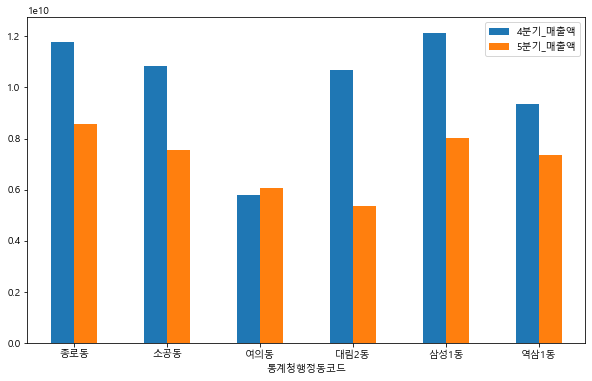

In [230]:
label = ['종로동', '삼성1동', '소공동', '역삼1동','여의동','대림2동']
bar=qa1.plot.bar(x='통계청행정동코드', y=['4분기_매출액','5분기_매출액'], rot=0)

# 결론
동작구 흑석동, 광진구 화양동, 동대문구 청량리동, 용산구 청파동, 영등포구 대림2동 = 매출 비율이 떡락해서 위험
영등포구 대림2동, 강남구 역삼1동, 중구 소공동 액수로는 떡락
종로1234 = 27% 강남구 삼성1동 = 34% 중구 소공동 = 30% 강남구 역삼1동 = 22% 영등포구 여의동 = 5%이익
성동구 송정동 249%이득 동대문구 휘경2동 117%이득 강북구 삼양동 92%이득=> 애초에 매출이 적어서 의미가 없을수도
영등포구 대림2동 = 중식 개업하는 순간 좆망
영등포구 여의동 = 가즈아~

# 3.의료

In [256]:
adult = data[data.서비스_업종_코드_명 == '의료']
adult10=adult[['기준_분기_코드','당월_매출_금액','통계청행정동코드']]
adult104=adult10[adult10['기준_분기_코드']==4]
adult104=adult104[['통계청행정동코드','당월_매출_금액']]
adult105=adult10[adult10['기준_분기_코드']==5]
adult105=adult105[['통계청행정동코드','당월_매출_금액']]
q4 = adult104.groupby('통계청행정동코드').sum().reset_index()
q5 = adult105.groupby('통계청행정동코드').sum().reset_index()
adult_sales= adult[['당월_매출_금액','통계청행정동코드']]
legeno = adult_sales.groupby('통계청행정동코드').sum().reset_index()
pd.options.display.float_format = '{:.2f}'.format
pd.Series(np.percentile(legeno['당월_매출_금액'], q=[0,20,40,60,80,100], interpolation='nearest'))

0              0.00
1     2561536439.00
2     5848524258.00
3    10342913917.00
4    18886816399.00
5   145426920559.00
dtype: float64

In [272]:
q4top = q4.sort_values(by="당월_매출_금액", ascending=False).groupby("통계청행정동코드")
q5top = q5.sort_values(by="당월_매출_금액", ascending=False).groupby("통계청행정동코드")

In [273]:
qa=pd.merge(q4,q5,how='outer',on='통계청행정동코드')

In [280]:
qatop
#파이차트로 증가퍼센티지랑 감소퍼센티지 비교?
#영등포구 신길3동 402%떡상
#마포구 서강동 217%상승
#강남구 도곡2동 186%상승

,통계청행정동코드,4분기_매출액,5분기_매출액,차이,비율
256,1119065,126105635.00,632975090.00,506869455.00,4.02
192,1114076,2973126.00,9430491.00,6457365.00,2.17
328,1123067,1351139001.00,3867805508.00,2516666507.00,1.86
87,1107057,1320760501.00,2587995176.00,1267234675.00,0.96
32,1103057,87199469.00,165080987.00,77881518.00,0.89
5,1101060,8773039.00,15740895.00,6967856.00,0.79
141,1111051,124405618.00,205381278.00,80975660.00,0.65
189,1114073,92630543.00,150893001.00,58262458.00,0.63
289,1121063,856944321.00,1385584397.00,528640076.00,0.62
335,1123080,577341436.00,932770690.00,355429254.00,0.62


In [274]:
qa['차이']=qa['당월_매출_금액_y']-qa['당월_매출_금액_x']

In [271]:
qatop=qa.sort_values(by='차이',ascending=False)

In [275]:
qatop['비율'] = qatop['차이']/qatop['당월_매출_금액_x']

In [279]:
qatop=qatop.sort_values(by='비율',ascending=False)

In [277]:
qatop.rename(columns = {'당월_매출_금액_y' : '5분기_매출액','당월_매출_금액_x' : '4분기_매출액'}, inplace = True)

In [288]:
qatop1=qatop.dropna()
qatop1
sum(qatop1['비율']>=0)

,통계청행정동코드,4분기_매출액,5분기_매출액,차이,비율
256,1119065,126105635.00,632975090.00,506869455.00,4.02
192,1114076,2973126.00,9430491.00,6457365.00,2.17
328,1123067,1351139001.00,3867805508.00,2516666507.00,1.86
87,1107057,1320760501.00,2587995176.00,1267234675.00,0.96
32,1103057,87199469.00,165080987.00,77881518.00,0.89
5,1101060,8773039.00,15740895.00,6967856.00,0.79
141,1111051,124405618.00,205381278.00,80975660.00,0.65
189,1114073,92630543.00,150893001.00,58262458.00,0.63
289,1121063,856944321.00,1385584397.00,528640076.00,0.62
335,1123080,577341436.00,932770690.00,355429254.00,0.62


In [289]:
qatop1=qatop.dropna()
qatop1
sum(qatop1['비율']>=0)

306

In [290]:
sum(qatop1['비율']<0)

41

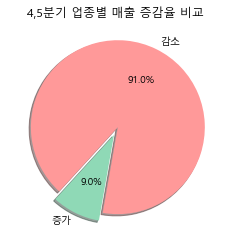

In [65]:
88,12
ratio = [9,91]
labels = ['증가','감소']
explode = [0.05,0.05]
colors = ['#8fd9b6','#ff9999']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.title('4,5분기 업종별 매출 증감율 비교')
plt.show()

In [284]:
mapping[mapping['통계청행정동코드']==1123067]

,통계청행정동코드,행정동코드_시각화,시도명,시군구명,행정동명
368,1123067,11680656,서울,강남구,도곡2동


# 4. 편의점

In [208]:
adult = data[data.서비스_업종_코드_명 == '일반대중음식']
adult10=adult[['기준_분기_코드','당월_매출_금액','통계청행정동코드']]
adult104=adult10[adult10['기준_분기_코드']==4]
adult104=adult104[['통계청행정동코드','당월_매출_금액']]
adult105=adult10[adult10['기준_분기_코드']==5]
adult105=adult105[['통계청행정동코드','당월_매출_금액']]
q4 = adult104.groupby('통계청행정동코드').sum().reset_index()
q5 = adult105.groupby('통계청행정동코드').sum().reset_index()
adult_sales= adult[['당월_매출_금액','통계청행정동코드']]
legeno = adult_sales.groupby('통계청행정동코드').sum().reset_index()
pd.options.display.float_format = '{:.2f}'.format
pd.Series(np.percentile(legeno['당월_매출_금액'], q=[0,20,40,60,80,100], interpolation='nearest'))

0              0.00
1     1340256569.00
2     2970639561.00
3     5405306032.00
4    11659624084.00
5   162669331366.00
dtype: float64

In [209]:
q4top = q4.sort_values(by="당월_매출_금액", ascending=False)
q5top = q5.sort_values(by="당월_매출_금액", ascending=False)

In [210]:
qa=pd.merge(q4,q5,how='outer',on='통계청행정동코드')
qa['차이']=qa['당월_매출_금액_y']-qa['당월_매출_금액_x']
qatop=qa.sort_values(by='차이',ascending=True)
qatop['비율'] = qatop['차이']/qatop['당월_매출_금액_x']
qatop = qatop.sort_values(by='비율',ascending=False)
qa.rename(columns = {'당월_매출_금액_y' : '5분기_매출액','당월_매출_금액_x' : '4분기_매출액'}, inplace = True)

In [211]:
q4top
#1123064	41201864613.00 강남구 역삼1동
#1102052	24946984877.00 중구 소공동
#1101061	21960287188.00 종로구 종로 1,2,3,4가동
#1118051	20699969783.00 금천구 가산동
#1114066	20638102212.00 마포구 서교동
#1123052	17373336856.00 강남구 논현1동
#1103065	15399745129.00 용산구 이태원1동
#1124059	14089134749.00 송파구 오륜동
#1119054	13773795628.00 영등포구 여의동
#1102059	12465582336.00 중구 광희동

,통계청행정동코드,당월_매출_금액
15,1102052,28828906887.00
331,1123064,27593220591.00
6,1101061,22259057124.00
327,1123058,15728704078.00
188,1114066,13466221914.00
256,1119054,12256456235.00
346,1124059,10758117294.00
17,1102055,9360138418.00
316,1122060,8657756816.00
182,1113075,8574456043.00


In [212]:
q5top
#1123064	38312057197.00 강남구 역삼1동(유일하게 top rank 유지)
#1102052	21453902529.00 중구 소공동
#1118051	19732001991.00 금천구 가산동
#1101061	18308312318.00 종로구 종로 1,2,3,4가동
#1114066	17446776214.00 마포구 서교동
#1123052	15942302720.00 강남구 논현1동
#1124059	12456270244.00 송파구 오륜동
#1119054	12397577549.00 영등포구 여의동

,통계청행정동코드,당월_매출_금액
331,1123064,22295202761.00
15,1102052,18968715744.00
6,1101061,16976554539.00
256,1119054,11071204299.00
188,1114066,10566583198.00
327,1123058,9487957545.00
346,1124059,9444298134.00
247,1118051,7488485836.00
234,1117054,7173943458.00
330,1123063,6902200689.00


In [343]:
mapping[mapping['통계청행정동코드']==1103065]

,통계청행정동코드,행정동코드_시각화,시도명,시군구명,행정동명
41,1103065,11170650,서울,용산구,이태원1동


In [213]:
qatop = qatop.dropna()
qatop
#동대문구 전농2동 31%증가
#금천구 독산2동 45%감소, 구로구 구로2동 36%감소, 동대문구 이문동 35%, 양천구 신월6동 30%감소
#용산구 이태원1동 23퍼 감소

,통계청행정동코드,당월_매출_금액_x,당월_매출_금액_y,차이,비율
162,1112060,493179.00,3654455.00,3161276.00,6.41
259,1119061,260020551.00,1486398022.00,1226377471.00,4.72
166,1112068,30176805.00,68662527.00,38485722.00,1.28
88,1107052,116888615.00,196078254.00,79189639.00,0.68
191,1114070,116327690.00,140524992.00,24197302.00,0.21
23,1102067,585501298.00,702251715.00,116750417.00,0.20
358,1124080,4317802041.00,5152579598.00,834777557.00,0.19
266,1119069,106259904.00,124687926.00,18428022.00,0.17
365,1125059,193570318.00,226423280.00,32852962.00,0.17
201,1115052,329011325.00,380908764.00,51897439.00,0.16


In [214]:
qa=pd.merge(q4,q5,how='outer',on='통계청행정동코드')
qa['차이']=qa['당월_매출_금액_x']-qa['당월_매출_금액_y']
qatop=qa.sort_values(by='차이',ascending=False)
qatop.rename(columns = {'당월_매출_금액_y' : '5분기_매출액','당월_매출_금액_x' : '4분기_매출액'}, inplace = True)

In [215]:
qatop

,통계청행정동코드,4분기_매출액,5분기_매출액,차이
15,1102052,28828906887.00,18968715744.00,9860191143.00
327,1123058,15728704078.00,9487957545.00,6240746533.00
331,1123064,27593220591.00,22295202761.00,5298017830.00
6,1101061,22259057124.00,16976554539.00,5282502585.00
182,1113075,8574456043.00,4882202433.00,3692253610.00
80,1106083,4597647066.00,1414890421.00,3182756645.00
20,1102059,7736390663.00,4572581105.00,3163809558.00
17,1102055,9360138418.00,6291955672.00,3068182746.00
188,1114066,13466221914.00,10566583198.00,2899638716.00
340,1123079,5401948465.00,2509494505.00,2892453960.00


In [216]:
qatop1 = qatop[qatop['통계청행정동코드'].isin([1102052,1123058,1123064,1101061,1113075,1106083])]

In [217]:
qatop1 = qatop1[['통계청행정동코드','4분기_매출액','5분기_매출액']]

In [221]:
string = {1102052:'소공동',1123058:'삼성1동',1123064:'역삼1동',1101061:'종로동',1113075:'신촌동',1106083:'전농1동'}
qatop1.통계청행정동코드 = qatop1.통계청행정동코드.map(string)

In [220]:
mapping[mapping['통계청행정동코드']==1106083]

,통계청행정동코드,행정동코드_시각화,시도명,시군구명,행정동명
87,1106083,11230560,서울,동대문구,전농1동


In [222]:
qatop1

,통계청행정동코드,4분기_매출액,5분기_매출액
15,소공동,28828906887.00,18968715744.00
327,삼성1동,15728704078.00,9487957545.00
331,역삼1동,27593220591.00,22295202761.00
6,종로동,22259057124.00,16976554539.00
182,신촌동,8574456043.00,4882202433.00
80,전농1동,4597647066.00,1414890421.00


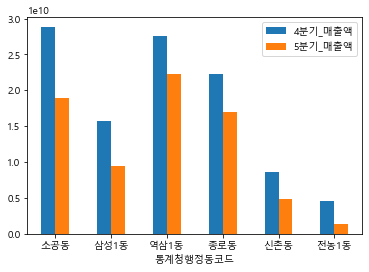

In [223]:
label = ['소공동','삼성1동','역삼1동','종로동','신촌동','전농1동']
bar=qatop1.plot.bar(x='통계청행정동코드', y=['4분기_매출액','5분기_매출액'], rot=0)

In [130]:
q4top

,통계청행정동코드,당월_매출_금액
325,1123064,16210531870.00
182,1114066,14137663943.00
15,1102052,12839629451.00
321,1123058,12696539727.00
6,1101061,12630148871.00
318,1123051,11967775571.00
250,1119054,11058512839.00
332,1123077,7146629029.00
319,1123052,5990264857.00
0,1101053,5766043900.00


In [131]:
q5top

,통계청행정동코드,당월_매출_금액
325,1123064,12483782528.00
182,1114066,10904623059.00
318,1123051,10151980395.00
6,1101061,10031519003.00
250,1119054,9199852166.00
15,1102052,9075780128.00
321,1123058,8519191023.00
332,1123077,5414319315.00
319,1123052,4831911633.00
333,1123078,4719792124.00
